## 이상치 처리

<li>이상치 :극단적인 값 또는 존재할 수 없는 값 </li> 
<li>이상치 처리 <br> 1) 행제거 또는 2) 값을 채워넣음(대표값 또는 예측값으로)</li>

In [4]:
import pandas as pd 

In [7]:
students = pd.read_csv("C:/Users/hrim1/0.hrim/students.csv")
students

,english,math,class
0,100,999,1
1,90,90,1
2,80,80,1
3,70,20,1
4,20,90,2
5,90,100,2
6,80,80,2
7,90,99,A


In [21]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   english  7 non-null      int64 
 1   math     7 non-null      int64 
 2   class    7 non-null      object
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes


#### 1) 범주형 변수의  이상치 확인 예

1반과 2반만 존재하는 학교라고 예를들자. 1과 2외의 데이터는 이상치 

In [11]:
# 클래스 열의 값이 1 또는 2인 행만 (이상치아닌것만)
students[students["class"].isin(['1','2'])]

,english,math,class
0,100,999,1
1,90,90,1
2,80,80,1
3,70,20,1
4,20,90,2
5,90,100,2
6,80,80,2


In [13]:
# 클래스 열의 값이 1 또는 2가 아닌 행만 <--- 이상치 
students[~students["class"].isin(['1','2'])  ] # ~를 붙이면 not 즉 이상치만 뽑은것.

,english,math,class
7,90,99,A


#### 이상치를 가진 행 삭제 예

In [14]:
students = students[ students["class"].isin(['1','2'])  ]

In [15]:
students

,english,math,class
0,100,999,1
1,90,90,1
2,80,80,1
3,70,20,1
4,20,90,2
5,90,100,2
6,80,80,2


#### 2) 연속형 변수의  이상치 확인 예

<img src="etc/4_boxplot.png" />
<img src="etc/5_boxplot.png" />

<img src="etc/3_boxplot.png" />

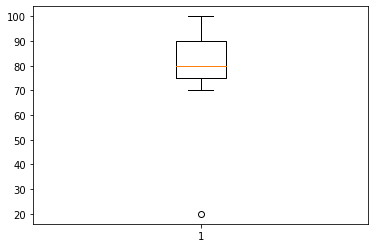

In [22]:
# Basic box plot
import matplotlib.pyplot as plt
%matplotlib inline 


a =plt.boxplot(students['english']) 
#동그라미 값이 이상치 임.

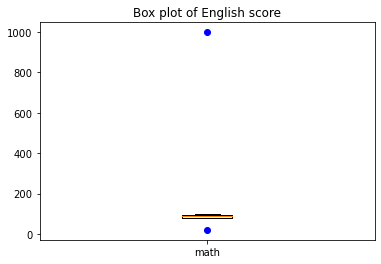

In [23]:
plt.boxplot(students['math'], sym="bo")
plt.title('Box plot of English score')
plt.xticks([1], ['math']) 
plt.show()

연속적 변수 이상치 구하기 예

In [26]:
import numpy as np
Q1 = np.percentile(students["math"], 25) 
Q3 = np.percentile(students["math"], 75) 
IQR = Q3 - Q1 
outlier_step = 1.5 * IQR

outlier_step                              

22.5

In [27]:
# 연속적 변수 이상치 출력 
students[(students["math"] < Q1 - outlier_step) | (students["math"] > Q3 + outlier_step)]  #최소값보다 작거나 최대값보다 큰값=이상치

,english,math,class
0,100,999,1
3,70,20,1
